# EDA

In [54]:
import numpy as np
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import model_selection

In [55]:
# metadata
df = pd.read_csv('csv_files/9_1_all_books_df.csv')

# vectorized text
# the index is reset in this one 
df_text = pd.read_csv('csv_files/X_train_nlp.csv')

# 'csv_files/y_train_nlp.csv', encoding='utf-8', index=False

In [56]:
# will concat X_train_nlp with X_train
# processing flow, split metadata, reset index to match nlp data, concat, subset bestsellers and not
X_train, X_test, y_train, y_test = model_selection.train_test_split(df[['title', 'author', 'format', 'genre', 'pages', 'rating']], 
                                                                    df['best_seller'], 
                                                                    test_size = .2,
                                                                    random_state = 42)

# reset the index to match processed df_text
len(X_train)
type(X_train)

# X_train.reset_index(drop = True)
# y_train.reset_index(drop = True)

# testing to rewrite index
X_train = X_train.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)

# metadata
- y_train is bestseller ~bestseller
- X_train is book meta data
- df_text is just text data

## concat meatadata and text dataframes

In [57]:
print('number of best sellers in training set', y_train.sum())
print('number of total books in training set', len(y_train))

number of best sellers in training set 227
number of total books in training set 1098


In [58]:
1098 - 227

871

In [59]:
871/(1098 +227)

0.6573584905660378

In [60]:
df.columns

Index(['author', 'description', 'format', 'genre', 'month', 'pages',
       'publisher', 'rating', 'title', 'year', 'best_seller'],
      dtype='object')

In [61]:
X_train['bestseller'] = y_train

In [62]:
# rename meta columns to not affect text dataframe
X_train.rename(columns={'genre':'book_genre', 'author':'meta_author', 
                        'title':'meta_title', 'format':'meta_format',
                        'pages':'meta_pages', 'rating':'meta_rating'},
                        inplace = True)
# X_train['book_genre'] = 

In [63]:
df = X_train.reset_index(drop = True)

In [64]:
df = pd.concat([df, df_text], axis =1)

In [65]:
df.shape

(1098, 5849)

In [66]:
# subset the dataframe into best sellers and not
books = df.loc[df['bestseller'] == 0]
best_books = df.loc[df['bestseller'] == 1]

## rating analysis

In [67]:
# check that every book is rated
df.meta_rating.isnull().sum()

0

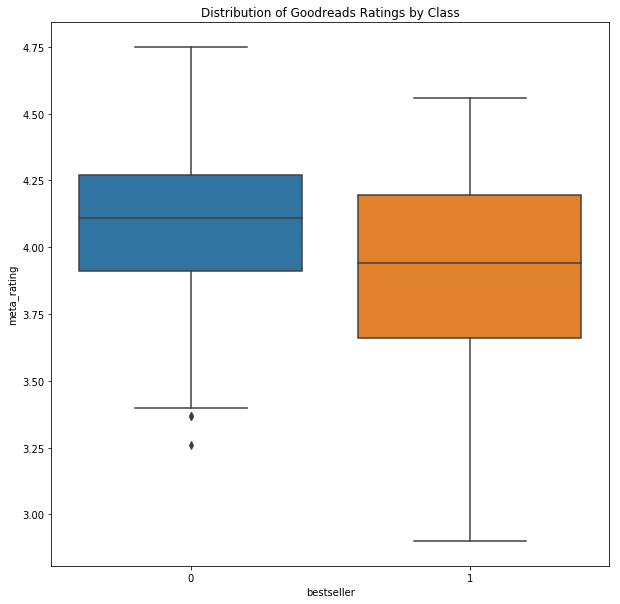

In [68]:
plt.figure(figsize=(10,10))
ratings = sns.boxplot(x=df["bestseller"], y=df['meta_rating']).set_title('Distribution of Goodreads Ratings by Class')


In [69]:
print('the raitng mean is',df.meta_rating.mean())
print('the rating mode is', df.meta_rating.mode()[0])
print('the raitng median is',df.meta_rating.median())

the raitng mean is 4.056265938069216
the rating mode is 4.07
the raitng median is 4.08


In [70]:
print('the raitng mean is',books.meta_rating.mean())
print('the rating mode is', books.meta_rating.mode()[0])
print('the raitng median is',books.meta_rating.median())

the raitng mean is 4.091733639494837
the rating mode is 4.27
the raitng median is 4.11


In [71]:
print('the raitng mean is',best_books.meta_rating.mean())
print('the rating mode is', best_books.meta_rating.mode()[0])
print('the raitng median is',best_books.meta_rating.median())

the raitng mean is 3.9201762114537426
the rating mode is 3.81
the raitng median is 3.94


## format analysis

In [72]:
df.meta_format.unique()

array(['Hardcover', 'Paperback', 'Mass Market Paperback',
       'Kindle Edition', 'ebook', 'Library Binding', 'Audio CD',
       'Trade Paperback'], dtype=object)

In [73]:
df.meta_format.value_counts()

Hardcover                836
Paperback                207
Kindle Edition            31
ebook                     17
Mass Market Paperback      4
Trade Paperback            1
Library Binding            1
Audio CD                   1
Name: meta_format, dtype: int64

In [74]:
# TODO drop from dataframe
df.loc[df['meta_format'] == 'Audio CD']

,meta_title,meta_author,meta_format,book_genre,meta_pages,meta_rating,bestseller,aaron,ab,abandon,...,zelda,zest,zeus,zillion,zimmer,zoe,zone,zoom,zorie,zoroastrian
390,Ninety-Nine Stories of God,Joy Williams,Audio CD,Short Stories,1,3.63,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## pages analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a25c045f8>,
      dtype=object)

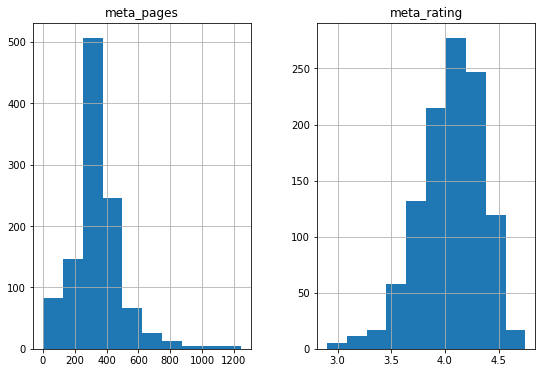

In [75]:
df.hist(column=['meta_pages', 'meta_rating'], figsize=(9,6))

## genre analysis

In [76]:
# need to look at book_genre more
df['book_genre'].unique()
# df['book_genre'].isnull().sum()

array(['Autobiography', 'Sequential Art', 'Economics', 'Fantasy',
       'Historical', 'Fiction', 'Nonfiction', 'Horror', 'Young Adult',
       'Poetry', 'Science', 'Short Stories', 'New Adult', 'Classics',
       'Contemporary', 'Science Fiction', 'Childrens', 'Food and Drink',
       'Humor', 'Thriller', 'Polyamorous', 'History', 'Romance',
       'Mystery', 'Media Tie In', 'Literature', 'Biography', 'Politics',
       'Paranormal', 'Writing', 'Dark', 'Business', 'Religion',
       'Philosophy', 'Christian', 'Sports and Games'], dtype=object)

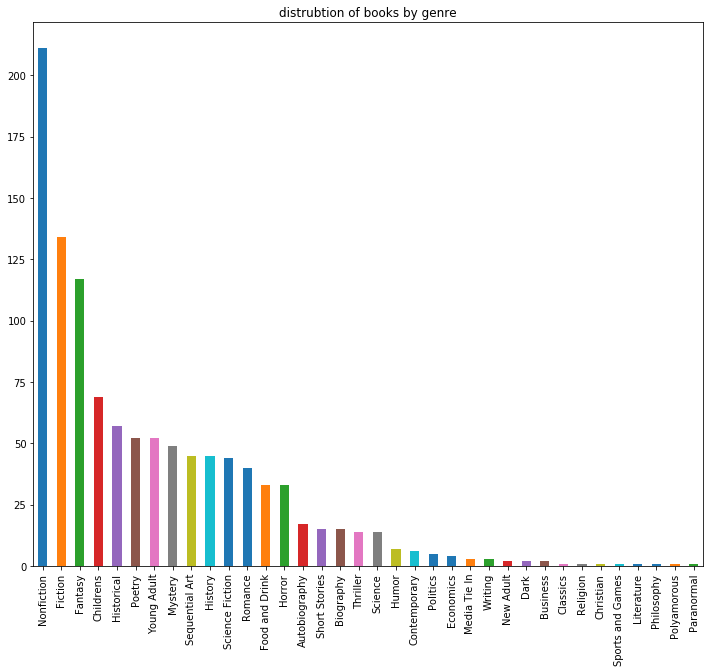

In [77]:
# distrubtion by genre of all books
df['book_genre'].value_counts().plot(kind='bar', title='distrubtion of books by genre', figsize=(12,10))


In [78]:
# this is just the distribution in the training data of bestsellers and not
# non-bestsellers
print(books.shape)
# bestsellers
print(best_books.shape)

(871, 5849)
(227, 5849)


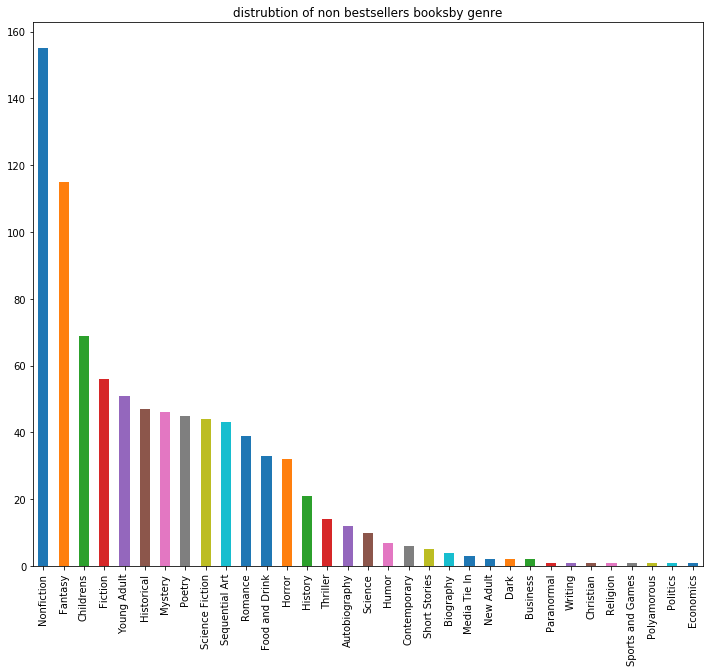

In [79]:
books['book_genre'].value_counts().plot(kind='bar', 
                                        title='distrubtion of non bestsellers booksby genre', figsize=(12,10))


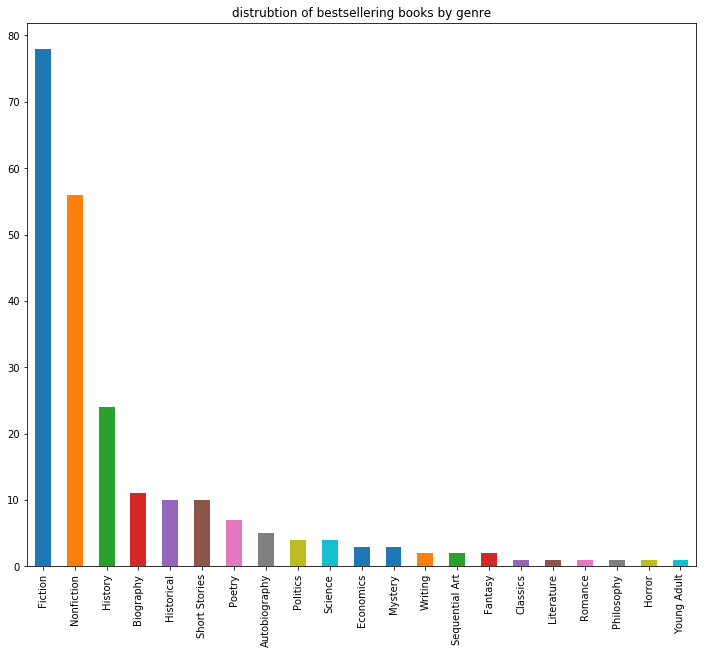

In [80]:
best_books['book_genre'].value_counts().plot(kind='bar', 
                                            title='distrubtion of bestsellering books by genre', figsize=(12,10))


In [81]:
print(' NYT bestselling genres',best_books['book_genre'].unique(), '\n \n', 
      'Non-bestselling genres', books['book_genre'].unique())

 NYT bestselling genres ['Economics' 'Fiction' 'Short Stories' 'Classics' 'Nonfiction' 'Science'
 'Autobiography' 'Sequential Art' 'Poetry' 'Literature' 'Biography'
 'Historical' 'History' 'Politics' 'Writing' 'Fantasy' 'Romance' 'Mystery'
 'Young Adult' 'Philosophy' 'Horror'] 
 
 Non-bestselling genres ['Autobiography' 'Sequential Art' 'Fantasy' 'Historical' 'Nonfiction'
 'Fiction' 'Horror' 'Young Adult' 'Poetry' 'Science' 'New Adult'
 'Contemporary' 'Science Fiction' 'Childrens' 'Food and Drink' 'Humor'
 'Thriller' 'Polyamorous' 'History' 'Romance' 'Mystery' 'Media Tie In'
 'Biography' 'Politics' 'Paranormal' 'Short Stories' 'Dark' 'Business'
 'Religion' 'Economics' 'Christian' 'Sports and Games' 'Writing']


In [82]:
print(' There are NYT bestselling',len(best_books['book_genre'].unique()), 'genres \n \n', 
'Non-bestselling genres', len(books['book_genre'].unique()))

 There are NYT bestselling 21 genres 
 
 Non-bestselling genres 33


In [83]:
print(" Genres that don't appear on the NYT bestseller list \n", 
      [x for x in books['book_genre'].unique() if not x in best_books['book_genre'].unique()])



 Genres that don't appear on the NYT bestseller list 
 ['New Adult', 'Contemporary', 'Science Fiction', 'Childrens', 'Food and Drink', 'Humor', 'Thriller', 'Polyamorous', 'Media Tie In', 'Paranormal', 'Dark', 'Business', 'Religion', 'Christian', 'Sports and Games']


These genres might be to predictive during modeling
- consider dropping books with those genres
- consolidating genres to 'top hits'

## author analysis

In [84]:
df.columns
df.meta_author.shape

(1098,)

In [85]:
print('There are', df.meta_author.unique().shape[0], 'unique authors of', df.meta_author.shape[0], 'books')

There are 955 unique authors of 1098 books


In [86]:
df.meta_author.value_counts()[:10]

Stephen King         6
Sarah J. Maas        6
Brandon Sanderson    5
Brian K. Vaughan     5
Rick Riordan         4
Penny Reid           3
Sarah Andersen       3
Mark  Lawrence       3
B.A. Paris           3
Tahereh Mafi         3
Name: meta_author, dtype: int64

Sarah j. Maas and Stephen King are the most prolific authors in the dataset.

In [87]:
# 111 authors have more than one book 
# 844 authors have one book on the Best Seller list
np.where(df.meta_author.value_counts() > 1)[0]


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110])

# Text EDA

In [88]:
# sorted(df_text.sum(axis=0),reverse=True )[0].index
df_text.sum(axis=0).index


Index(['aaron', 'ab', 'abandon', 'abandonment', 'abby', 'abc', 'abduct',
       'abducted', 'ability', 'able',
       ...
       'zelda', 'zest', 'zeus', 'zillion', 'zimmer', 'zoe', 'zone', 'zoom',
       'zorie', 'zoroastrian'],
      dtype='object', length=5842)

In [114]:
# df_text.sum(axis=0).where(df_text.sum(axis=0) == 150)
# df_text.sum(axis=0).where(df_text.sum(axis=0) == 150)
# df_text.sum(axis=0)[df_text.sum(axis=0).value ==150]
df_text.sum(axis=0).max()
# 151 is the max number
# find the word that sum is 151
df_text.sum(axis=0)[df_text.sum(axis=0) == df_text.sum(axis=0).max()]
# df_text.sum(axis=0)[151]

time    151
dtype: int64

In [90]:
df_text.sum(axis=0)['time']

151

In [91]:
df_text.sum(axis=0)['prize']

23

In [92]:
sorted(df_text.sum(axis=0), reverse=True)[0]

151

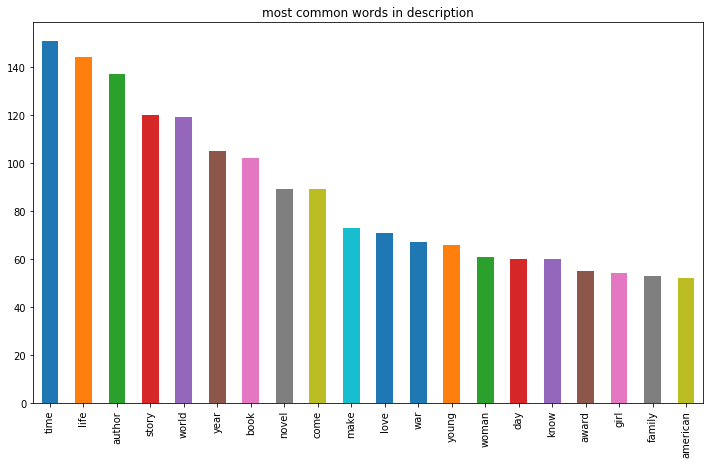

In [93]:
type(df_text.sum(axis=0).sort_values(ascending=False)[:20])
df_text.sum(axis=0).sort_values(ascending=False)[:20].plot(kind='bar', figsize=(12,7), 
                                                            title='most common words in description')





In [96]:
best_books.columns

Index(['meta_title', 'meta_author', 'meta_format', 'book_genre', 'meta_pages',
       'meta_rating', 'bestseller', 'aaron', 'ab', 'abandon',
       ...
       'zelda', 'zest', 'zeus', 'zillion', 'zimmer', 'zoe', 'zone', 'zoom',
       'zorie', 'zoroastrian'],
      dtype='object', length=5849)

In [99]:
books.columns

Index(['meta_title', 'meta_author', 'meta_format', 'book_genre', 'meta_pages',
       'meta_rating', 'bestseller', 'aaron', 'ab', 'abandon',
       ...
       'zelda', 'zest', 'zeus', 'zillion', 'zimmer', 'zoe', 'zone', 'zoom',
       'zorie', 'zoroastrian'],
      dtype='object', length=5849)

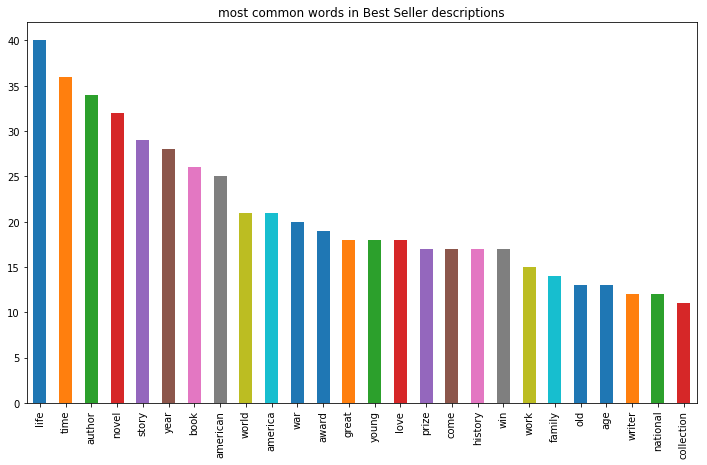

In [109]:
# print(books.shape)
# bestsellers
# print(best_books.shape)

best_books.loc[:, ~df.columns.isin(['meta_title', 'meta_author', 'meta_format', 'book_genre', 'meta_pages',
       'meta_rating', 'bestseller'])].sum(axis=0).sort_values(ascending=False)[:26].plot(kind='bar', figsize=(12,7), 
                                                            title='most common words in Best Seller descriptions')

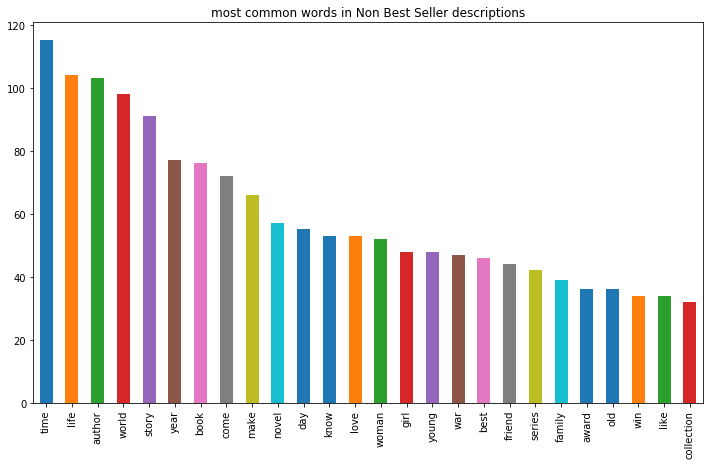

In [110]:
books.loc[:, ~df.columns.isin(['meta_title', 'meta_author', 'meta_format', 'book_genre', 'meta_pages',
       'meta_rating', 'bestseller'])].sum(axis=0).sort_values(ascending=False)[:26].plot(kind='bar', figsize=(12,7), 
                                                            title='most common words in Non Best Seller descriptions')

# TODO
- Add text feature EDA
- export graphics to readme 
- clean dataframe